<a href="https://colab.research.google.com/github/mosh98/GroceryDatasetExploration/blob/main/GroceryStore_Dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset from kaggle
https://www.kaggle.com/roshansharma/market-basket-optimization

In [ ]:
!pip install mlxtend

In [ ]:
!pip install squarify

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import squarify
import warnings


In [44]:
grocery_data = pd.read_csv('/content/drive/My Drive/Market_Basket_Optimisation.csv',names=['products'],header=None)
grocery_data

,,,,,,,,,,,,,,,,,,,products
shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grocery_data.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [43]:
#grocery_data = grocery_data.sample(2500)
grocery_data

,,,,,,,,,,,,,,,,,,,products
shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Visualization

**2.Frequency of items**

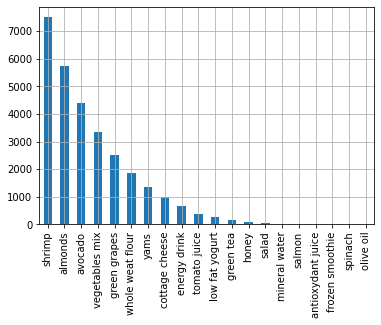

In [8]:
fig,ax = plt.subplots( )

color = plt.cm.copper(np.linspace(0, 1, 40))

grocery_data.count().plot(ax = ax, kind='bar')
plt.grid()


#Transcoder 
Goal of this is to convert each word into boolean values.


In [9]:
trans = []
for i in range(0,grocery_data.shape[0]):
  trans.append([str(grocery_data.values[i,j]) for j in range(0,grocery_data.shape[1]) ])

trans = np.array(trans)
print(trans.shape)

(7500, 20)


In [21]:
te = TransactionEncoder()
data = te.fit_transform(trans)

In [ ]:
data = pd.DataFrame(data, columns= te.columns_)
data

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Columns: 121 entries,  asparagus to zucchini
dtypes: bool(121)
memory usage: 886.4 KB


In [50]:
df1 = apriori(data,min_support=0.01,use_colnames=True)
df1

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
514,0.011067,"(ground beef, milk, nan, mineral water)"
515,0.017067,"(spaghetti, ground beef, nan, mineral water)"
516,0.015733,"(spaghetti, milk, nan, mineral water)"
517,0.010267,"(olive oil, nan, mineral water, spaghetti)"


In [53]:
df1.sort_values(by='support',ascending=False,)

,support,itemsets
50,1.000000,(nan)
267,0.238267,"(nan, mineral water)"
46,0.238267,(mineral water)
19,0.179733,(eggs)
165,0.179733,"(eggs, nan)"
...,...,...
430,0.010133,"(low fat yogurt, frozen vegetables, nan)"
417,0.010000,"(french fries, shrimp, nan)"
190,0.010000,"(french fries, shrimp)"
200,0.010000,"(frozen smoothie, frozen vegetables)"


In [54]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.020267,(almonds),1
1,0.033200,(avocado),1
2,0.010800,(barbecue sauce),1
3,0.014267,(black tea),1
4,0.011467,(body spray),1
...,...,...,...
514,0.011067,"(ground beef, milk, nan, mineral water)",4
515,0.017067,"(spaghetti, ground beef, nan, mineral water)",4
516,0.015733,"(spaghetti, milk, nan, mineral water)",4
517,0.010267,"(olive oil, nan, mineral water, spaghetti)",4


###Get item with a sup treshold greater than 0.05 where itemset containing items greater than 2

In [58]:
df1[(df1['length']>=2) & (df1['support']>=0.05)]

,support,itemsets,length
92,0.087200,"(burgers, nan)",2
104,0.081067,"(nan, cake)",2
118,0.060000,"(nan, chicken)",2
132,0.052667,"(mineral water, chocolate)",2
133,0.163867,"(nan, chocolate)",2
147,0.080400,"(nan, cookies)",2
151,0.051067,"(cooking oil, nan)",2
164,0.050933,"(eggs, mineral water)",2
165,0.179733,"(eggs, nan)",2
177,0.079333,"(escalope, nan)",2


##Association Rules

In [60]:
#input dataframe needs to contain support and itemset
df_ar = association_rules(df1, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(nan),0.020267,1.000000,0.020267,1.00000,1.000000,0.000000,inf
1,(avocado),(nan),0.033200,1.000000,0.033200,1.00000,1.000000,0.000000,inf
2,(barbecue sauce),(nan),0.010800,1.000000,0.010800,1.00000,1.000000,0.000000,inf
3,(black tea),(nan),0.014267,1.000000,0.014267,1.00000,1.000000,0.000000,inf
4,(body spray),(nan),0.011467,1.000000,0.011467,1.00000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
260,"(ground beef, milk)","(nan, mineral water)",0.022000,0.238267,0.011067,0.50303,2.111207,0.005825,1.532756
261,"(spaghetti, ground beef, mineral water)",(nan),0.017067,1.000000,0.017067,1.00000,1.000000,0.000000,inf
262,"(spaghetti, milk, mineral water)",(nan),0.015733,1.000000,0.015733,1.00000,1.000000,0.000000,inf
263,"(olive oil, mineral water, spaghetti)",(nan),0.010267,1.000000,0.010267,1.00000,1.000000,0.000000,inf
